<center><img src="https://raw.githubusercontent.com/Mihir-Ai-lab/The_Data_Science_Guy/main/Images/Notebook%20Header.png" width="1200" height="627" /></center>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
    2.1 [**Project Details**](#Section21)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
    3.1 [**Installing Libraries**](#Section31)<br>
    3.2 [**Upgrading Libraries**](#Section32)<br>
    3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
    4.1 [**Data Description**](#Section41)<br>
    4.2 [**Data Information**](#Section42)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
    6.1 [**Handling Missing Values**](#Section61)<br>
    6.2 [**Handling Redundant Data & Outliers**](#Section62)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
    8.1 [**How do Investments vary between High & Low Net worth Customers?**](#Section81)<br>
    8.2 [**How do Personal details like Age, Gender, Marital Status & Children affect the net worth?**](#Section82)<br>
    8.3 [**How do Professional Factors like Occupation & Income of self & Partner affect the net worth?**](#Section83)<br>
    8.4 [**How does the tenure (years since last moved) relate to the total investment?**](#Section84)<br>
    8.5 [**How is the total spending distributed across different income categories?**](#Section85)<br>
    8.6 [**Which Region has more HNI's??**](#Section86)<br>
    8.7 [**How is Insurance related to net worth?**](#Section87)<br>
    8.8 [**What are the Portfolio balances of HNI's?**](#Section88)<br>
9. [**Feature Selection and PCA**](#Section9)<br>
    9.1 [**Feature Selection with Correlation Matrix**](#Section91)<br>
    9.2 [**Encoding Categorical Variables**](#Section92)<br>
    9.3 [**Balancing Dataset with SMOTE**](#Section93)<br>
    9.4 [**Feature Scaling**](#Section94)<br>
10. [**Model Development & Evaluation**](#Section10)<br>
    10.1 [**Initializing & Running Classifiers**](#Section101)<br>
11. [**Submission**](#Section11)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

**Company Introduction - AE Corp**

Our client for this project is a retail banking institution.

- They are going to float a stock trading facility for their existing customers.
- The idea is to use data to classify whether a customer belongs to a high net worth or low net worth group.
- They will have to incentivize their customers to adopt their offerings.
- One way to incentivize could be to offer discounts on the commission for trading transactions.

**Current Scenario**

The company rolled out this service to about 10,000+ of its customers and observed their trading behavior for 6 months and after that, they labeled them into two revenue grids 1 and 2.

---
<a name = Section2></a>
# **2. Problem Statement**
---

The current process suffers from the following problems:

- Only about 10% of the customers do enough trades for earnings after discounts to be profitable.
- The company wants to figure out, which are those 10% customers so that it can selectively offer them a discount.

<p align="center"><img src="https://raw.githubusercontent.com/Mihir-Ai-lab/Academic-Projects/main/Images/Classification.gif"></p>

<a name = Section21></a>
### **2.1 Project Details**

- Co-ordinating with - The marketing department to supplement their campaigns with a more proactive approach.

- Our Role - To build a classification model using the datasets.

- Project Deliverables - Predict whether a customer belongs to a high net worth or low net worth group.

- Machine Learning Task: Classification

- Target Variable: Status (high net worth (1) / low net worth (2))

- Win Condition - No machine learning model in the company for this currently, therefore no quantifiable win condition. We just need to build the best possible model.

- Evaluation Metric - The model evaluation will be based on the F1 Score score.

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**

<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
!pip install -q scikit-learn
!pip install -q matplotlib seaborn
!pip install -q category_encoders
!pip install -q imbalanced-learn

<a name = Section31></a>
### **3.2 Upgrading Libraries**

In [2]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade scikit-learn

In [3]:
# Runtime Restart Reminder

print('\n' + 'Libraries Upgraded please restart runtime')
print('\n' + '-'*45)


Libraries Upgraded please restart runtime

---------------------------------------------


<a name = Section31></a>
### **3.3 Importing Libraries**

In [4]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas.api.types import CategoricalDtype
#-------------------------------------------------------------------------------------------------------------------------------
# Configure pandas display options for better readability
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clarity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values 
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpy (For Numerical Python)
np.set_printoptions(precision=2, suppress=True)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # Importing StandardScaler for data normalization
from sklearn.preprocessing import LabelEncoder                      # Importing LabelEncoder for label encoding
from sklearn.preprocessing import OneHotEncoder                     # Importing OneHotEncoder for one-hot encoding
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression                # Importing LogisticRegression classifier
from sklearn.svm import SVC                                         # Importing Support Vector Classifier (SVC)
from sklearn.tree import DecisionTreeClassifier                     # Importing Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier                 # Importing Random Forest Classifier
from sklearn.ensemble import GradientBoostingClassifier             # Importing Gradient Boosting Classifier
from sklearn.naive_bayes import GaussianNB                          # Importing Gaussian Naive Bayes Classifier
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import f1_score                                # Importing f1_score for model evaluation
from sklearn.model_selection import GridSearchCV                    # Importing GridSearchCV for hyperparameter tuning
from sklearn.model_selection import train_test_split                # Importing train_test_split for data splitting
#-------------------------------------------------------------------------------------------------------------------------------
from imblearn.over_sampling import SMOTE                            # Importing SMOTE for handling imbalanced data
#-------------------------------------------------------------------------------------------------------------------------------
from ipywidgets import interact                                     # Importing interact for creating UI controls
import warnings                                                     # Importing warning to disable runtime warnings
import multiprocessing
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
#-------------------------------------------------------------------------------------------------------------------------------
from ydata_profiling import ProfileReport                           # Import Pandas Profiling (To generate Univariate Analysis)

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

We are provided with a dataset containing all the necessary information about the customers like their occupation, family income, gender, region, balance transfer, children, etc.

Also included in the dataset is the column Revenue_Grid which classifies the customers into high net worth customers (1) and low net worth customers (2).

This is the data that we have to predict for future customers.

---

Train Set: The train set contains 8124 rows and 32 columns.The last column Revenue_Grid is the target variable.

Test Set: The test set contains 2031 rows and 31 columns.The test set doesn’t contain the Revenue_Grid column which need to be predicted

The Dataset contains the following columns:


|Id|Feature|Description|
|:--|:--|:--|
|01|REF_NO| Reference Number of the customer.|
|02|children|Number of children each customer has.|
|03|Age_band|Age Group to which the customer belongs.|
|04|status|Marital Status of the customer.|
|05|occupation|Job or profession of the customer.|
|06|occupation_partner|Job or profession of the customer's partner.|
|07|home_status|Home Status of the customers.|
|08|family_income|Income Range of the customer's family.|
|09|self_employed|Whether self-employed or not.|
|10|self_employed_partner|Whether the partner self-employed or not.|
|11|year_last_moved|Moving Year from the last location of the customer.|
|12|TVarea|Television Region of the customer.|
|13|post_code|Postal Code of the customer.|
|14|post_area|Postal Area of the customer.|
|15|Average_Credit_Card_Transaction|Average Credit Card Transaction per year by the customer.|
|16|Balance_Transfer|Transfer of the Balance in an account to another account by the customer.|
|17|Term_Deposit|Cash Investment Help at Financial Institute provided to the customer.|
|18|Life_Insurance|Basic Life Insurance Coverage of the customer.|
|19|Medical_Insurance|Medical Insurance Coverage of the customer.|
|20|Average_A/C_Balance|Average Balance in the account of the customer.|
|21|Personal_Loan|Amount of Personal Loan taken by the customer.|
|22|Investment_in_Mutual_Fund|Amount Invested in Mutual Funds by the customer.|
|23|Investment_Tax_Saving_Bond|Amount Invested in Tax Saving Bond by the customer.|
|24|Home_Loan|Amount of Home Loan taken by the customer.|
|25|Online_Purchase_Amount|Amount spent by the customer on online purchases.|
|26|gender|Gender of the customer.|
|27|region|Religion of the customer.|
|28|Investment_in_Commudity|Amount Invested in Commodity by the customer.|
|29|Investment_in_Equity|Amount Invested in Equity by the customer.|
|30|Investment_in_Derivative|Amount Invested in Derivatives by the customer.|
|31|Portfolio_Balance|Balanced Investment Strategy of the customer.|
|32|Revenue_Grid|Grid report of the customers.|

In [5]:
# Acquiring Data from "https://raw.githubusercontent.com/Mihir-Ai-lab/Academic-Projects/main/ML%20Projects/AE%20Corp"

print('\n' + '-'*25 + '\n')
print('Acquiring Data' + '\n' + 'Loaded Dataset: df_train & df_test')
print('\n' + '-'*25 + '\n')

df_train = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/Mihir-Ai-lab/Insaid/main/ML%20Projects/AE%20Corp/existing_base_train.csv')
df_test = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/Mihir-Ai-lab/Insaid/main/ML%20Projects/AE%20Corp/existing_base_test.csv')

# Checking Shape & Head

print('Training Data Shape:',df_train.shape)
print('Test Data Shape:',df_test.shape)
print('\n' + '-'*25 + '\n')
print('Training Data Head')
print('\n' + '-'*10 + '\n')
df_train.head(10)


-------------------------

Acquiring Data
Loaded Dataset: df_train & df_test

-------------------------

Training Data Shape: (8124, 32)
Test Data Shape: (2031, 31)

-------------------------

Training Data Head

----------



,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,1981,Meridian,M51 0GU,M51,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,1997,Meridian,L40 2AG,L40,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,1996,HTV,TA19 9PT,TA19,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,1990,Scottish TV,FK2 9NG,FK2,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,1989,Yorkshire,LS23 7DJ,LS23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2
5,3309,Zero,45-50,Partner,Secretarial/Admin,Business Manager,Own Home,">=35,000",No,No,1984,Ulster,BT17 9NA,BT17,9.49,0.01,0.00,0.51,55.89,0.00,28.98,0.00,0.00,0.00,0.00,Female,Northern Ireland,13.18,4.83,14.23,33.62,2
6,6610,Zero,36-40,Partner,Secretarial/Admin,Secretarial/Admin,Own Home,"<30,000, >=27,500",Yes,No,1986,Central,B62 8TF,B62,9.99,0.00,0.00,0.00,0.00,26.96,22.99,80.42,1.00,3.99,5.49,Female,West Midlands,2.00,23.48,21.90,13.12,2
7,10621,Zero,61-65,Partner,Retired,Retired,Own Home,"<20,000, >=17,500",No,No,1998,Granada,PR8 2TY,PR8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29.95,0.00,0.00,0.00,Male,North West,0.00,4.99,4.99,15.74,2
8,2630,1,45-50,Partner,Professional,Professional,Own Home,">=35,000",No,No,1980,Unknown,CF15 9TH,CF15,0.00,82.96,0.00,40.47,12.49,0.00,28.97,0.00,0.00,0.00,0.00,Female,Unknown,27.18,4.83,13.66,36.05,2
9,9356,3,36-40,Partner,Professional,Housewife,Own Home,"<27,500, >=25,000",Yes,No,1997,Meridian,M13 9BG,M13,0.00,0.00,0.00,0.00,0.00,0.00,15.99,0.00,24.47,0.00,0.00,Male,North West,0.00,6.74,6.74,8.60,2


<a name = Section42></a>
### **4.1 Data Description**

In [6]:
df_train.describe()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
count,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00
mean,5797.34,1967.88,23.25,46.08,27.28,65.32,18.83,31.84,25.42,41.72,6.06,4.42,19.20,36.15,21.44,31.53,89.35,1.89
std,3322.50,182.56,51.15,79.08,54.13,95.76,32.02,45.25,85.13,64.42,12.67,9.95,92.34,42.47,32.26,39.48,108.30,0.31
min,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-78.43,1.00
25%,2924.75,1978.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.28,4.66,8.74,26.28,2.00
50%,5811.50,1988.00,0.00,17.48,0.00,31.48,0.01,14.98,0.00,23.48,0.00,0.00,0.00,23.59,12.82,21.14,65.56,2.00
75%,8681.50,1994.00,23.48,64.99,34.49,92.89,26.97,45.92,20.83,59.44,5.49,4.49,7.48,49.80,27.97,42.39,123.97,2.00
max,11518.00,1999.00,662.26,2951.76,784.82,2930.41,591.04,626.24,4905.93,2561.27,156.87,162.35,4306.42,1231.09,1279.10,1771.16,4283.56,2.00


### Observations

- There are a total of 8,124 observations in the dataset, and all the columns have non-null values

- The `year_last_moved` column has min value 0. This will need to be dealt with. Maybe splitting the columns into wether moved recently or not might do the trick. Recently here can be defined as the  median value of Non-Null entires in this column

- The distribution of values for financial product columns (such as Average_Credit_Card_Transaction, Balance_Transfer, etc.) is very spread out, as indicated by their high standard deviations. This suggests there is a great degree of variability in the levels of investment and usage of these products by the customers.

- Several columns have a minimum value of 0 (such as Average_Credit_Card_Transaction, Balance_Transfer, Term_Deposit, etc.). This indicates that a significant portion of customers do not use or invest in these specific financial products.

- The `Portfolio_Balance` column has a minimum value of -78.43, which might indicate data errors or negative balances due to loans or other financial issues that could be affecting the customer's balance. 

- The `Revenue_Grid` column has a mean value of 1.89, which is very close to 2. This suggests that the majority of observations belong to the higher revenue grid, making it an imbalanced dataset. This can affect the performance of machine learning models, Hence resampling, assigning higher weights to the minority class, or using evaluation metrics suitable for imbalanced datasets might be needed.

<a name = Section43></a>
### **4.2 Data Information**

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

In [8]:
# Detailed Profile Report of training Data for univariate analysis

profile = ProfileReport(df=df_train) 

print('\n' + '-'*40 + '\n')
print('AE Corp Pre-profile Report Generated')
print('\n' + '-'*40 + '\n')


----------------------------------------

AE Corp Pre-profile Report Generated

----------------------------------------



In [9]:
# Loading profile report to file for record keeping

profile.to_file("AEcorp_preprofile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

In [10]:
# Making a copy of the Dataset incase it needs to be reffered back to
df_train_og = df_train.copy(deep=True)
df_test_og = df_test.copy(deep=True)

In [11]:
# Define a dictionary to map the old column names to new standardized column names

column_names = {
    'REF_NO': 'ref_no',
    'children': 'num_children',
    'Age_band': 'age_group',
    'status': 'marital_status',
    'TVarea': 'tv_region',
    'post_code': 'postcode',
    'Average_Credit_Card_Transaction': 'avg_credit_card_txn',
    'Balance_Transfer': 'balance_transfer',
    'Term_Deposit': 'term_deposit',
    'Life_Insurance': 'life_insurance',
    'Medical_Insurance': 'medical_insurance',
    'Average_A/C_Balance': 'avg_account_balance',
    'Personal_Loan': 'personal_loan',
    'Investment_in_Mutual_Fund': 'mutual_fund_investment',
    'Investment_Tax_Saving_Bond': 'tax_saving_bond_investment',
    'Home_Loan': 'home_loan',
    'Online_Purchase_Amount': 'online_purchase_amount',
    'Investment_in_Commudity': 'commodity_investment',
    'Investment_in_Equity': 'equity_investment',
    'Investment_in_Derivative': 'derivative_investment',
    'Portfolio_Balance': 'portfolio_balance',
    'Revenue_Grid': 'net_worth'
}

# Rename the columns of the train and test datasets
df_train = df_train.rename(columns=column_names)
df_test = df_test.rename(columns=column_names)

In [12]:
# Extracting Categorical & Numerical columns to perform further analysis & cleaning
categorical_cols = df_train.select_dtypes('object').columns
numerical_cols = df_train.select_dtypes(['int', 'float']).columns

# Checking Unique Values in Dataset by taking a sample and displaying a few unique values
print('\n' + 'Having a look at unique Values in each Column')
print('\n' + '-'*50 + '\n')

for col in df_train.columns:
    unique_vals = df_train[col].unique()
    num_unique = len(unique_vals)
        
    print("Column Name: {}\n".format(col))
    if col in categorical_cols:
        print("Data Type: Categorical | Unique Values: {}\n".format(num_unique))
        print(unique_vals[:])
    else:
        print("Data Type: Numerical | Unique Values: {}\n".format(num_unique))
        print(df_train[col].sample(300).unique()[:10])
        
    print('\n' + '-'*70 + '\n')


Having a look at unique Values in each Column

--------------------------------------------------

Column Name: ref_no

Data Type: Numerical | Unique Values: 8124

[10702  6994  6089  9699  6781  1923 10107  5872  2725  3892]

----------------------------------------------------------------------

Column Name: num_children

Data Type: Categorical | Unique Values: 5

['2' 'Zero' '1' '3' '4+']

----------------------------------------------------------------------

Column Name: age_band

Data Type: Categorical | Unique Values: 13

['31-35' '45-50' '36-40' '55-60' '61-65' '65-70' '41-45' '51-55' '26-30'
 '22-25' '71+' 'Unknown' '18-21']

----------------------------------------------------------------------

Column Name: marital_status

Data Type: Categorical | Unique Values: 5

['Partner' 'Divorced/Separated' 'Single/Never Married' 'Widowed' 'Unknown']

----------------------------------------------------------------------

Column Name: occupation

Data Type: Categorical | Unique Values

<a name = Section61></a>
### **6.1 Handling Missing Values**

In [13]:
# Function to replace Unknown, Unclassified, Other & 0's with NaNs
def replace_unknown_with_nan(df, columns):
    for col in columns:
        if col != 'net_worth':
            df[col] = df[col].replace({'Unknown', 'Unclassified', 'Other', 'Zero', 'zero', 0}, np.nan)
    return df

# Replacing Unknown & Unclassified with NaNs in categorical columns
df_train = replace_unknown_with_nan(df_train, categorical_cols)
df_test = replace_unknown_with_nan(df_test, categorical_cols)

# Replacing Unknown & Unclassified with NaNs in numerical columns
df_train = replace_unknown_with_nan(df_train, [col for col in numerical_cols if col != 'net_worth'])
df_test = replace_unknown_with_nan(df_test, [col for col in numerical_cols if col != 'net_worth'])

In [14]:
print(df_train.isnull().sum())

ref_no                           0
num_children                  4991
age_band                        44
marital_status                  40
occupation                     881
occupation_partner            2203
home_status                     44
family_income                  108
self_employed                    0
self_employed_partner            0
year_last_moved                 69
tv_region                      154
postcode                         0
post_area                        0
avg_credit_card_txn           4989
balance_transfer              3524
term_deposit                  4587
life_insurance                2454
medical_insurance             4046
avg_account_balance           2806
personal_loan                 5134
mutual_fund_investment        2602
tax_saving_bond_investment    5133
home_loan                     5609
online_purchase_amount        5700
gender                          31
region                         866
commodity_investment           825
equity_investment   

### **Observations**

- Missing Values & Occupation can be filled with the logic of Retirment at the age of 60

<a name = Section62></a>
### **6.2 Handling Redundant Data**

### **Observations**

- 'tv_region', 'postcode', 'post_area' & 'region' all indicate the same thing. We can use the other 3 columns to impute missing values in region & drop them.

In [15]:
# Combine df_train and df_test for region and post_area dictionary
combined_df = pd.concat([df_train[['region', 'post_area']], df_test[['region', 'post_area']]])

# Drop duplicates and remove rows with null region values
combined_df = combined_df.drop_duplicates().dropna(subset=['region'])

# Create a dictionary using the existing region and post_area values
region_post_area_dict = combined_df.set_index('post_area')['region'].to_dict()

# Check for multiple regions per post_area
post_areas_regions = combined_df.groupby('post_area').count()
multiple_regions = post_areas_regions[post_areas_regions['region'] > 1]

print("\nPost areas with multiple regions:")
print(multiple_regions)


Post areas with multiple regions:
Empty DataFrame
Columns: [region]
Index: []


In [16]:
def impute_region(row, region_dict):
    region = row['region']
    post_area = row['post_area']

    if pd.isna(region):
        if post_area in region_dict:
            region = region_dict[post_area]
        else:
            region = 'Unknown'

    return region

In [17]:
def preprocess_data(df):
    # 1. Replace and fill missing values in num_children column
    df['num_children'] = df['num_children'].replace({'4+': 4}).fillna(0).astype(int)

    # 2. Impute missing values in age_band based on occupation='Retired'
    df['age_band'] = df.apply(lambda row: '71+' if pd.isnull(row['age_band']) and row['occupation'] == 'Retired' else row['age_band'], axis=1)
    df['age_band'] = df['age_band'].fillna('Unknown')

    # 3. Impute missing values in occupation based on age_band
    retired_ages = ['60-65', '65-70', '71+']
    df['occupation'] = df['occupation'].mask((df['age_band'].isin(retired_ages)) & (df['occupation'].isnull()), 'Retired')
    df['occupation'] = df['occupation'].fillna('Unknown')

    # 4. Impute missing values in region using the region_post_area_dict
    df['region'] = df.apply(lambda row: impute_region(row, region_post_area_dict), axis=1)

    # 5. Impute missing values in year_last_moved with median value
    df['year_last_moved'] = df['year_last_moved'].fillna(df['year_last_moved'].median())

    # 6. Replace NaN values in categorical columns with 'Unknown'
    categorical_cols = df.select_dtypes(include='object').columns
    df[categorical_cols] = df[categorical_cols].fillna('Unknown')

    # 7. Replace NaN values in numerical columns with 0
    numerical_cols = df.select_dtypes(include=['int', 'float']).columns
    df[numerical_cols] = df[numerical_cols].fillna(0)

    # 8. Drop unnecessary columns
    df.drop(columns=['tv_region', 'postcode', 'post_area', 'ref_no'], inplace=True)

    return df

In [18]:
# Apply the preprocess_data function to both the training and test dataframes

df_train = preprocess_data(df_train)
df_test = preprocess_data(df_test)

---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

- Getting a report about the data after the data manipulation.


In [19]:
# Profile Report of Cleaned Dataset

profile = ProfileReport(df=df_train) 
print('\n' + '-'*40 + '\n')
print('AE Corp Post-profile Report Generated')


----------------------------------------

AE Corp Post-profile Report Generated


In [20]:
# Loading profile report to file for record keeping

profile.to_file("AEcorp_postprofile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

In [21]:
# Split the dataset into HNW and LNW customer subsets
hnw_df = df_train[df_train['net_worth'] == 1]
lnw_df = df_train[df_train['net_worth'] == 2]

<a name = Section81></a>
### **8.1 How do Investments vary between High & Low Net worth Customers?**

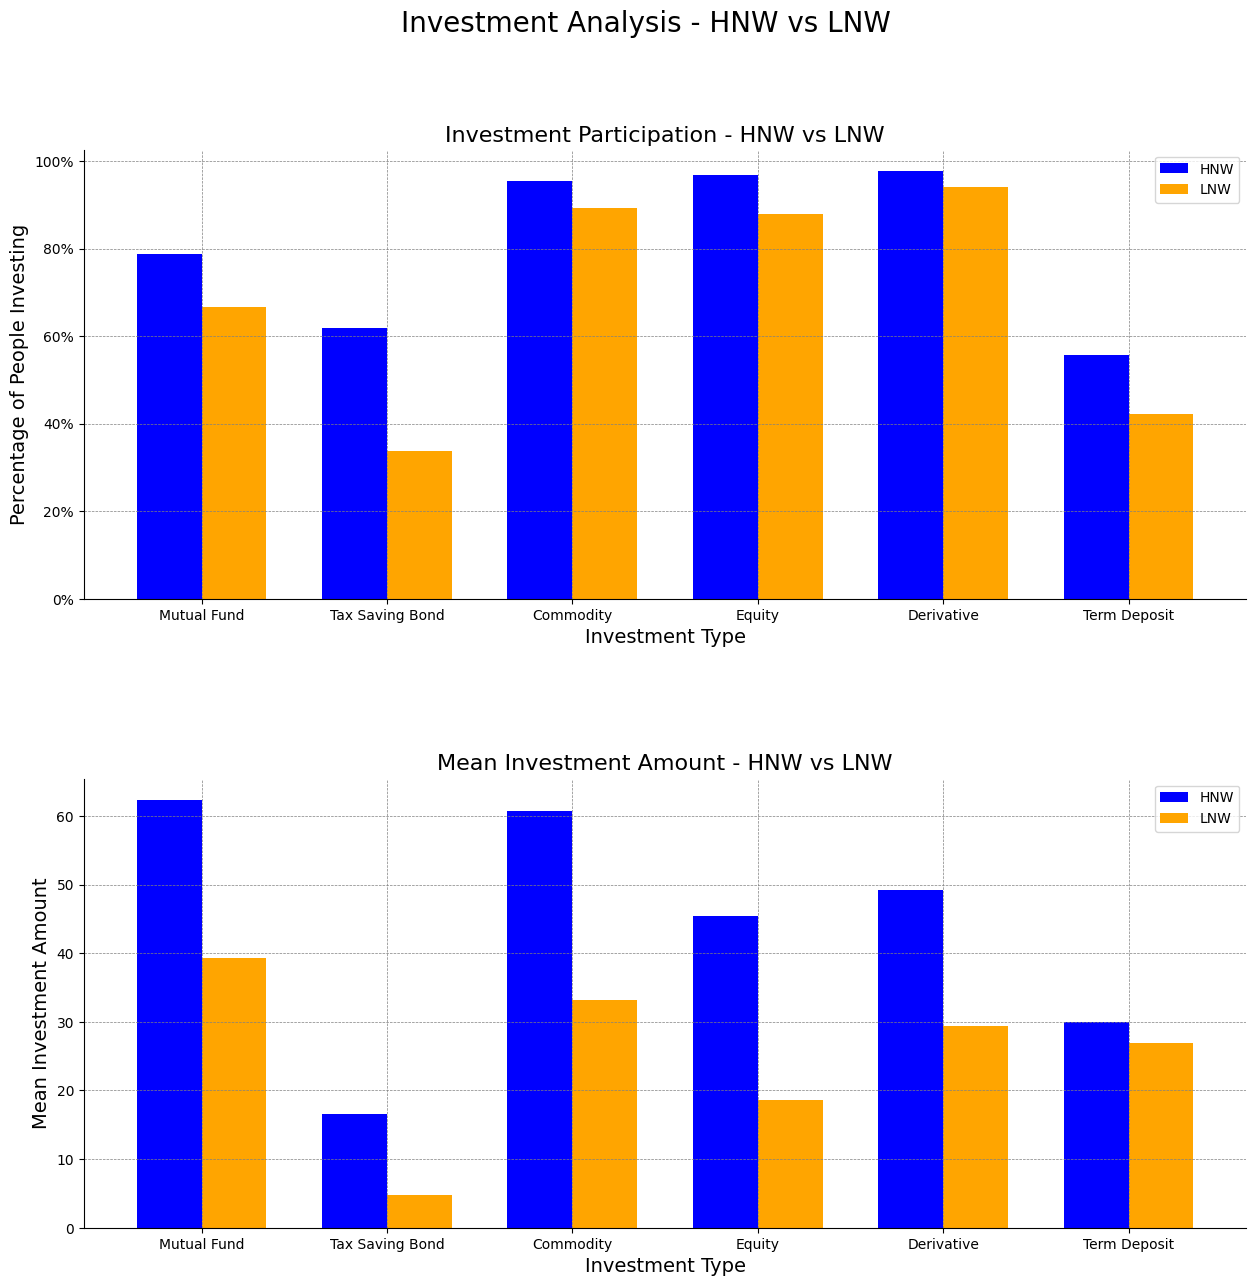

In [22]:
# Investment columns
investment_columns = ['mutual_fund_investment', 'tax_saving_bond_investment', 'commodity_investment',
                      'equity_investment', 'derivative_investment', 'term_deposit']

# Calculate investment proportions for HNW and LNW customers
hnw_investment_counts = [len(hnw_df[hnw_df[column] > 0]) for column in investment_columns]
lnw_investment_counts = [len(lnw_df[lnw_df[column] > 0]) for column in investment_columns]

hnw_proportions = np.array(hnw_investment_counts) / len(hnw_df)
lnw_proportions = np.array(lnw_investment_counts) / len(lnw_df)

# Calculate mean investment amounts for HNW and LNW customers
mean_investment_hnw = [hnw_df[column].mean() for column in investment_columns]
mean_investment_lnw = [lnw_df[column].mean() for column in investment_columns]

# Create investment table
investment_types = ['Mutual Fund', 'Tax Saving Bond', 'Commodity', 'Equity', 'Derivative', 'Term Deposit']

data = {
    'Investment Type': investment_types,
    'HNW Proportion': hnw_proportions,
    'LNW Proportion': lnw_proportions,
    'Mean Investment HNW': mean_investment_hnw,
    'Mean Investment LNW': mean_investment_lnw
}

investment_table = pd.DataFrame(data)
investment_table[['HNW Proportion', 'LNW Proportion']] = investment_table[['HNW Proportion', 'LNW Proportion']].applymap('{:.2%}'.format)

# Plotting
bar_width = 0.35
index = np.arange(len(investment_columns))

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 14))
fig.subplots_adjust(hspace=0.4)

# Bar plot - Investment Proportions
rects1 = ax1.bar(index, hnw_proportions, bar_width, label='HNW', color='blue')
rects2 = ax1.bar(index + bar_width, lnw_proportions, bar_width, label='LNW', color='orange')

ax1.set_xlabel('Investment Type', fontsize=14)
ax1.set_ylabel('Percentage of People Investing', fontsize=14)
ax1.set_title('Investment Participation - HNW vs LNW', fontsize=16)
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(investment_types)
ax1.set_yticks(np.arange(0, 1.2, 0.2))
ax1.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
ax1.legend()

# Bar plot - Mean Investment Amount
ax2.bar(index, mean_investment_hnw, bar_width, label='HNW', color='blue')
ax2.bar(index + bar_width, mean_investment_lnw, bar_width, label='LNW', color='orange')

ax2.set_xlabel('Investment Type', fontsize=14)
ax2.set_ylabel('Mean Investment Amount', fontsize=14)
ax2.set_title('Mean Investment Amount - HNW vs LNW', fontsize=16)
ax2.set_xticks(index + bar_width / 2)
ax2.set_xticklabels(investment_types)
ax2.legend()

# Set overall title for the plot
fig.suptitle('Investment Analysis - HNW vs LNW', fontsize=20)

# Add some decorative elements
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='gray', linestyle='--', linewidth=0.5)

plt.show()

<a name = Section82></a>
### **8.2 How do Personal details like Age, Gender, Marital Status & Children affect the net worth?**

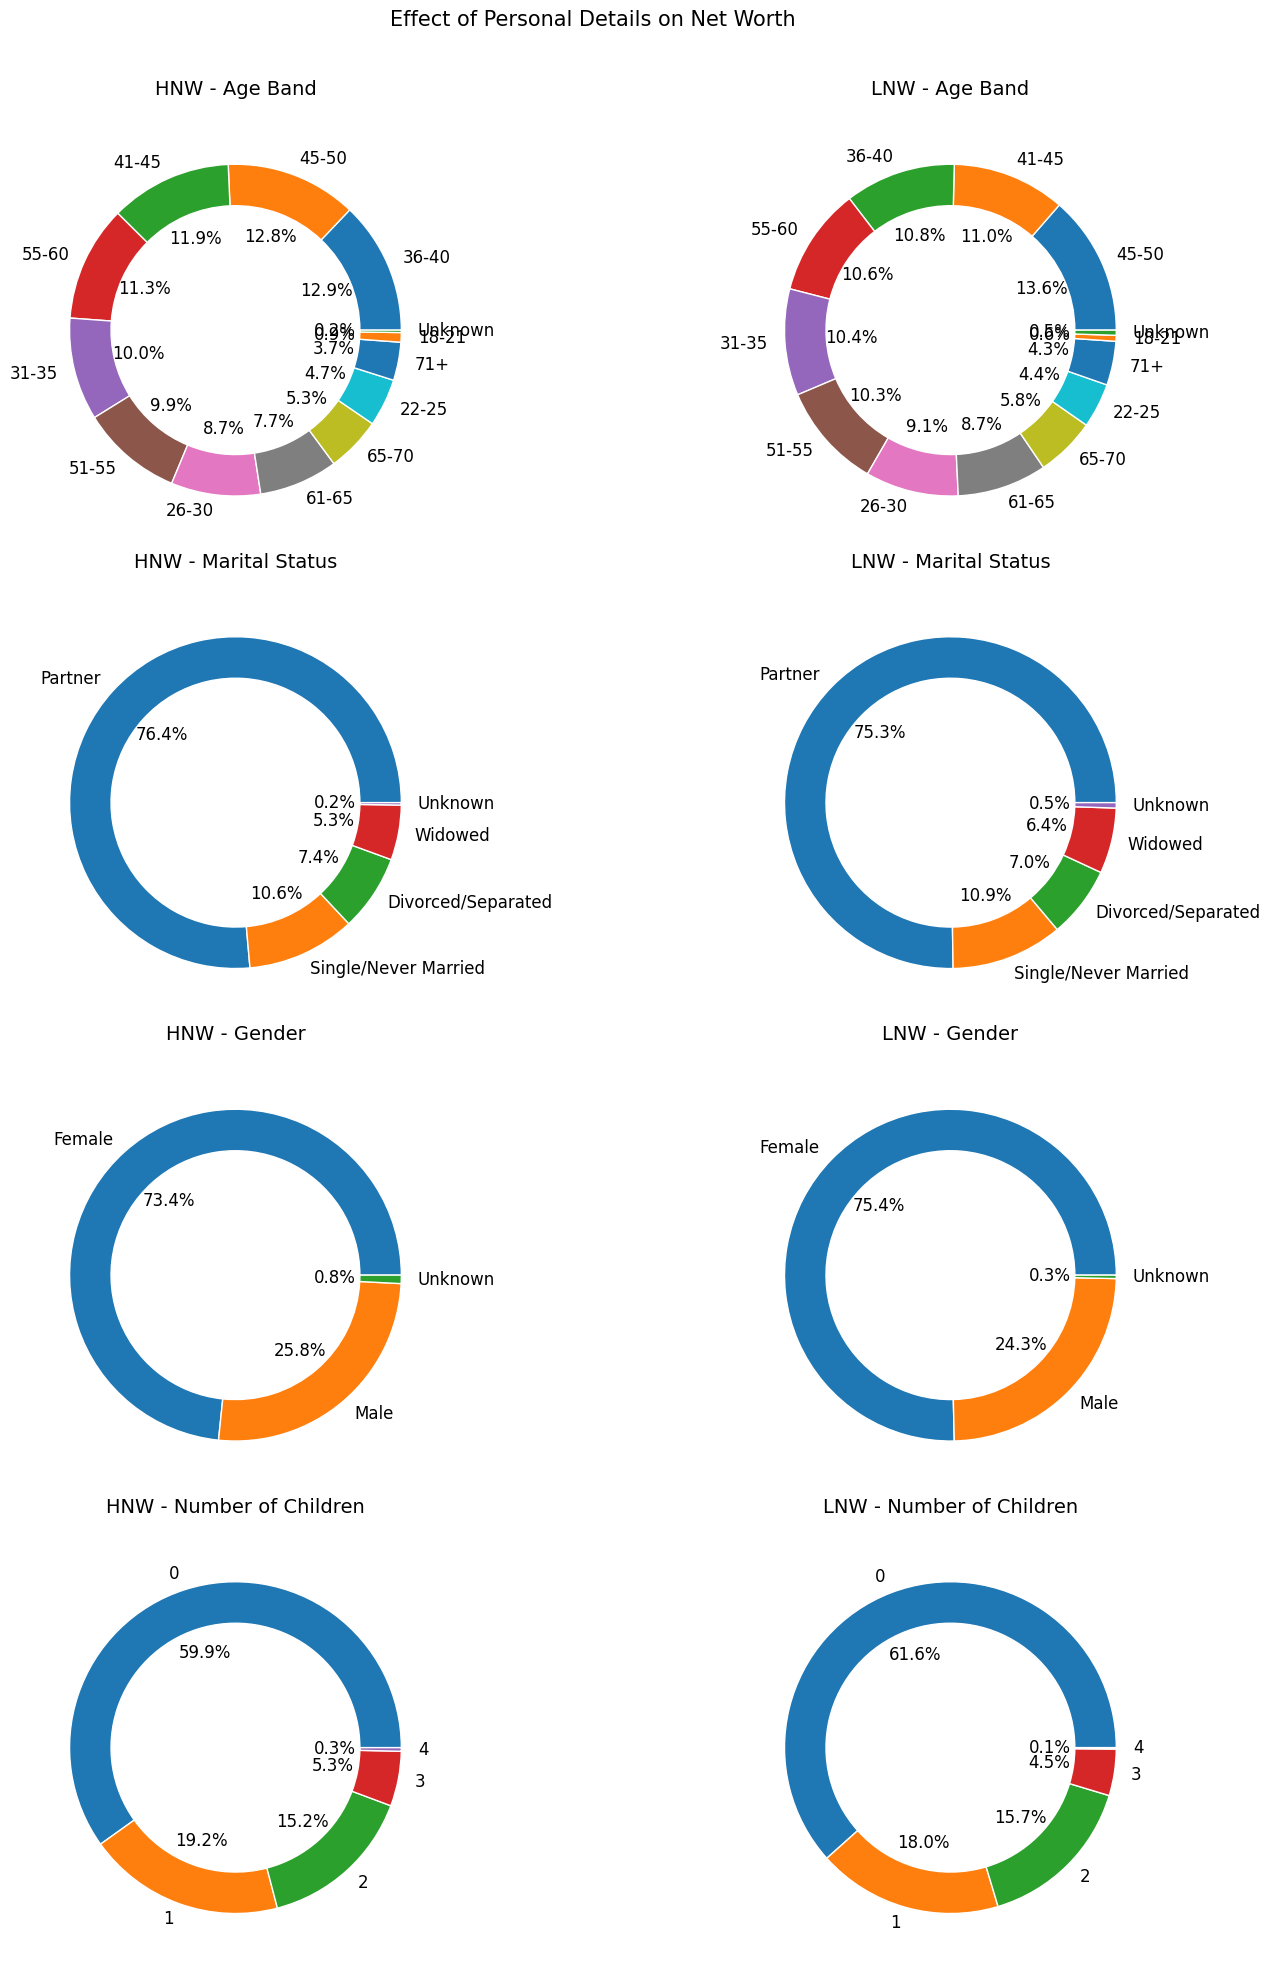

In [23]:
personal_details = ['age_band', 'marital_status', 'gender', 'num_children']
detail_labels = ['Age Band', 'Marital Status', 'Gender', 'Number of Children']

# Creating canvas
fig, axes = plt.subplots(4, 2)
fig.set_size_inches(16, 20)
fig.tight_layout(pad=5.0)
fig.suptitle('Effect of Personal Details on Net Worth', size=15)

# Iterate over personal details
for i, detail in enumerate(personal_details):
    # Calculate the percentage of each category for HNW and LNW customers
    hnw_counts = hnw_df[detail].value_counts()
    hnw_perc = hnw_counts / hnw_counts.sum() * 100

    lnw_counts = lnw_df[detail].value_counts()
    lnw_perc = lnw_counts / lnw_counts.sum() * 100

    # Plot the pie chart for HNW customers
    plt.sca(axes[i, 0])
    plt.pie(hnw_perc, labels=hnw_perc.index, autopct='%1.1f%%', wedgeprops={'width':0.25, 'edgecolor':'white'},
            pctdistance=0.6, textprops={'size':12})
    axes[i, 0].set_title(f'HNW - {detail_labels[i]}', fontsize=14, pad=20)

    # Plot the pie chart for LNW customers
    plt.sca(axes[i, 1])
    plt.pie(lnw_perc, labels=lnw_perc.index, autopct='%1.1f%%', wedgeprops={'width':0.25, 'edgecolor':'white'},
            pctdistance=0.6, textprops={'size':12})
    axes[i, 1].set_title(f'LNW - {detail_labels[i]}', fontsize=14, pad=20)

# Adjust subplot spacing and margins
fig.tight_layout(rect=[0, 0, 1, 0.97])

# Display the plot
plt.show()


<a name = Section83></a>
### **8.3 How do Professional Factors like Occupation & Income of self & Partner affect the net worth?**

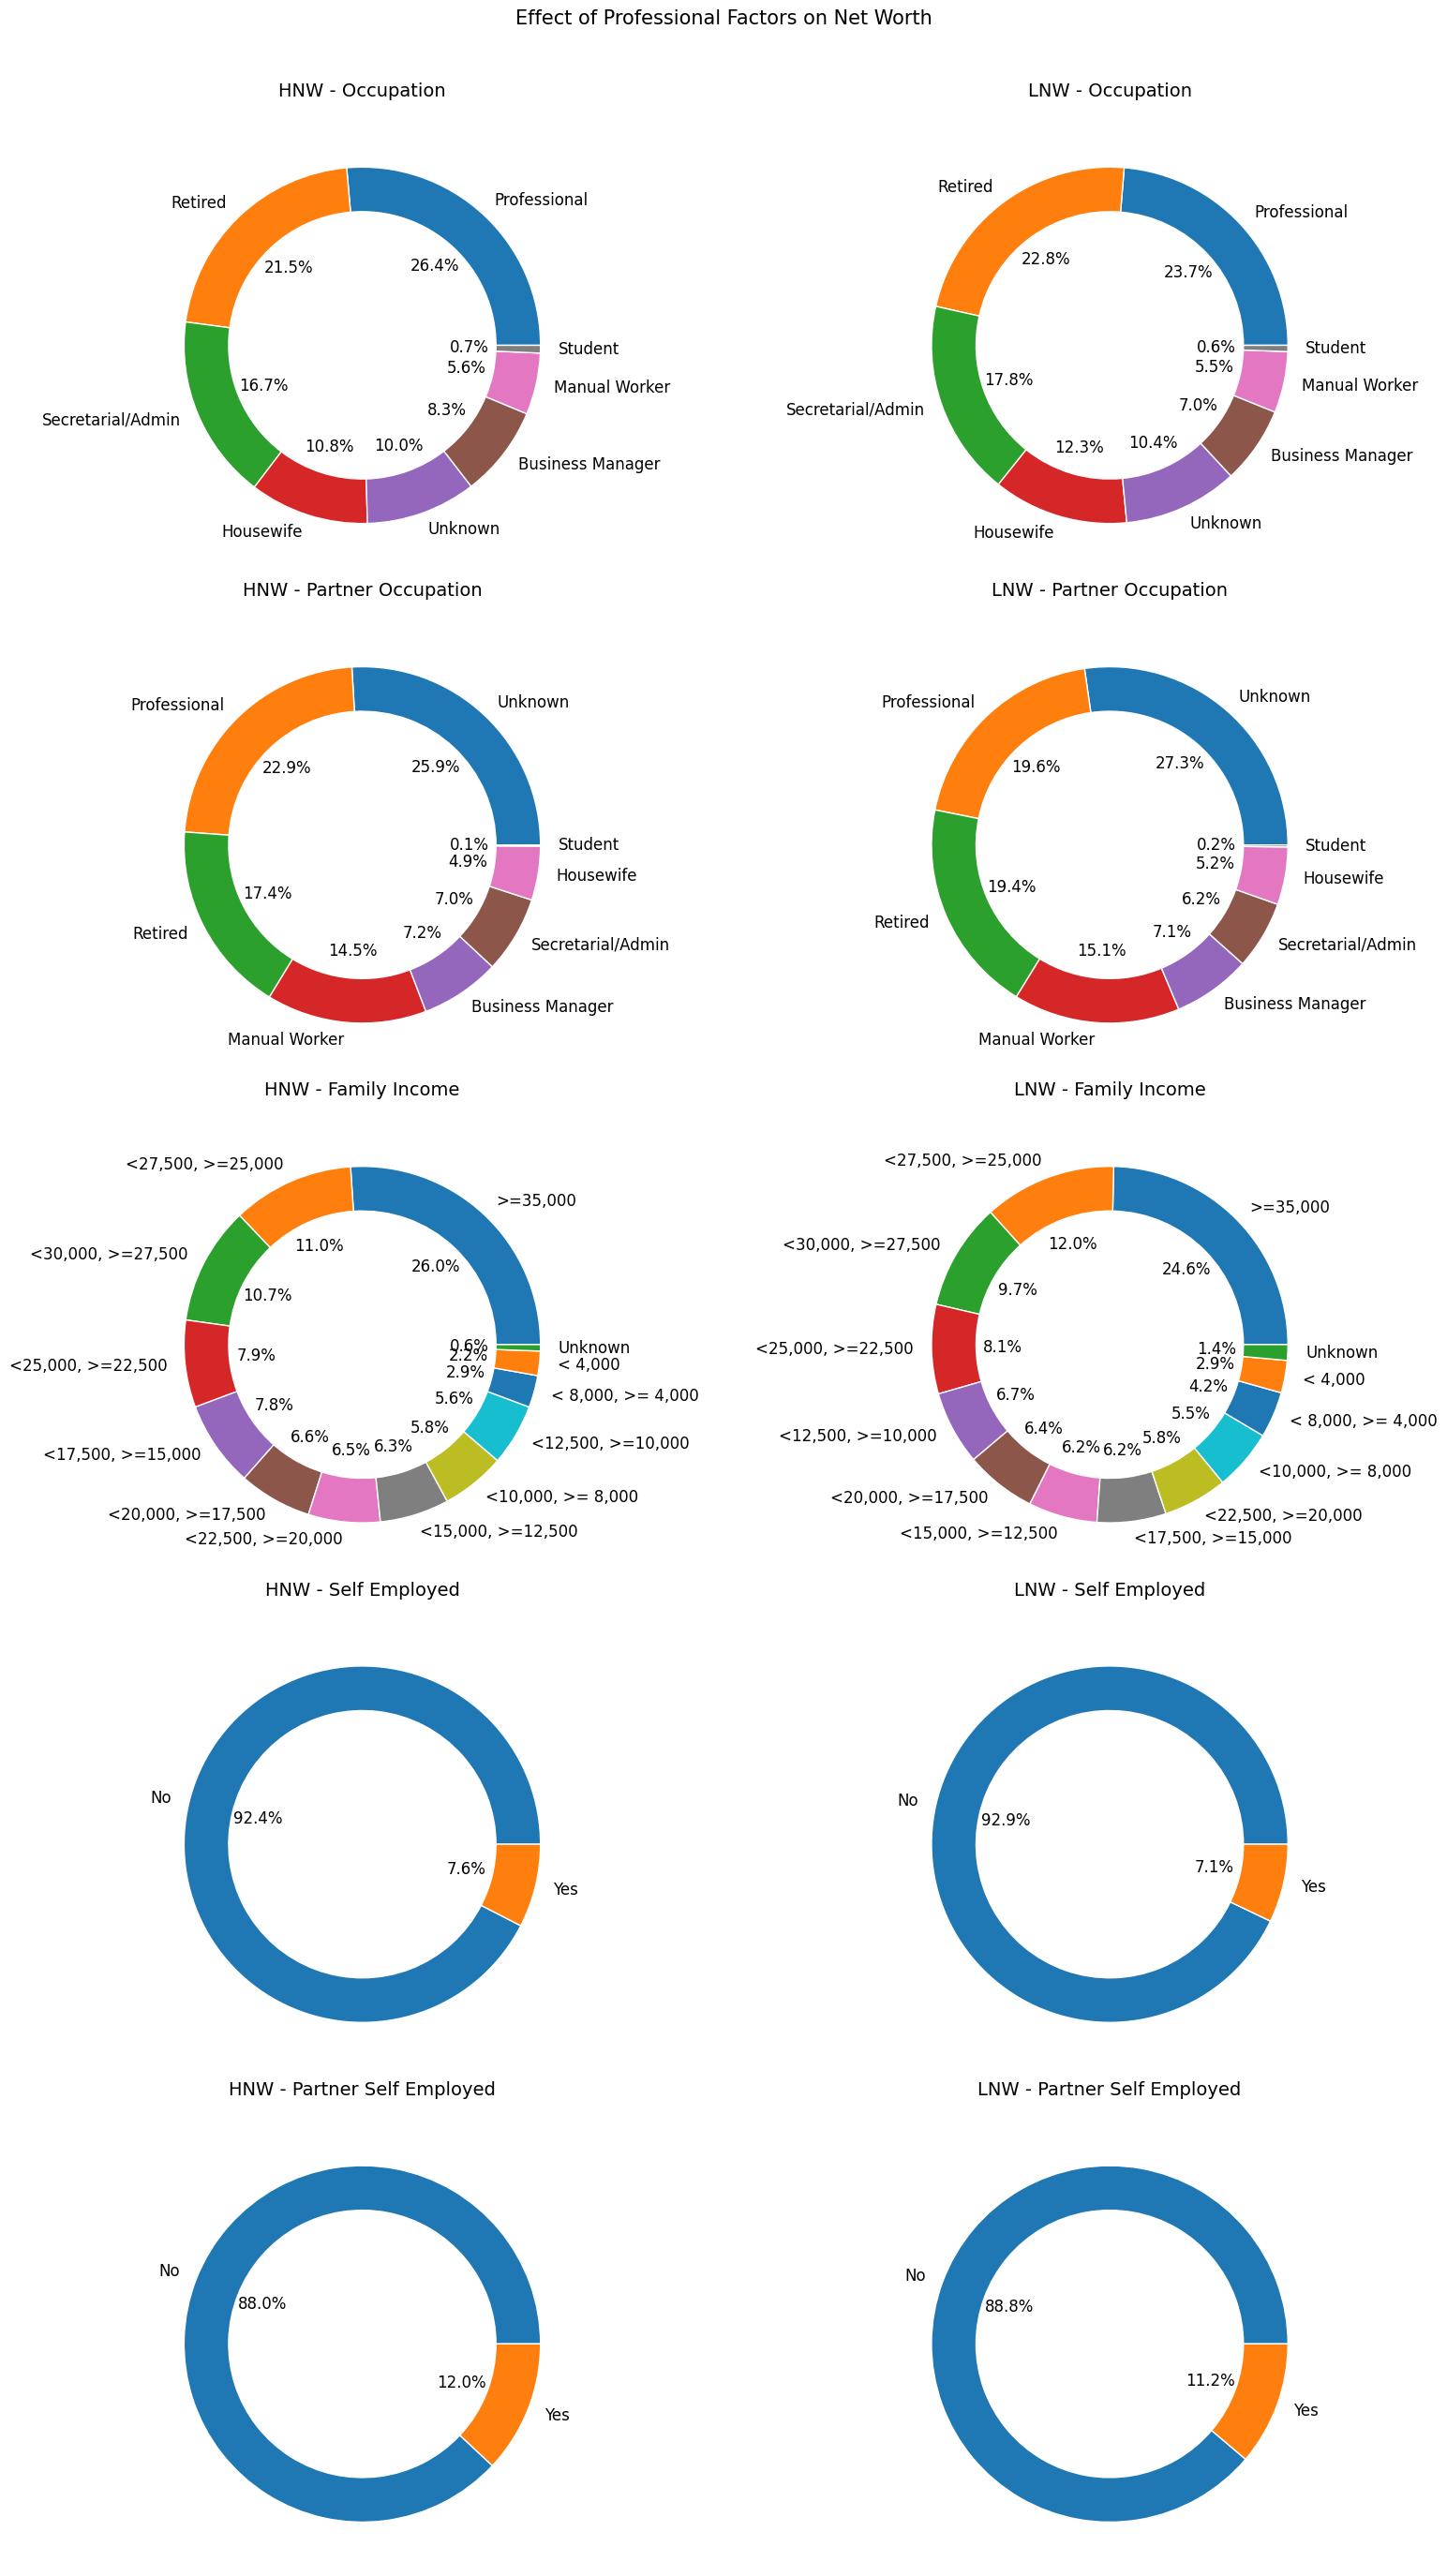

In [24]:
professional_factors = ['occupation', 'occupation_partner', 'family_income', 'self_employed', 'self_employed_partner']
factor_labels = ['Occupation', 'Partner Occupation', 'Family Income', 'Self Employed', 'Partner Self Employed']

# Creating canvas
fig, axes = plt.subplots(5, 2)
fig.set_size_inches(16, 28)
fig.tight_layout(pad=5.0)
fig.suptitle('Effect of Professional Factors on Net Worth', size=15)

# Iterate over professional factors
for i, factor in enumerate(professional_factors):
    # Calculate the percentage of each category for HNW and LNW customers
    hnw_counts = hnw_df[factor].value_counts()
    hnw_perc = hnw_counts / hnw_counts.sum() * 100

    lnw_counts = lnw_df[factor].value_counts()
    lnw_perc = lnw_counts / lnw_counts.sum() * 100

    # Plot the pie chart for HNW customers
    plt.sca(axes[i, 0])
    plt.pie(hnw_perc, labels=hnw_perc.index, autopct='%1.1f%%', wedgeprops={'width':0.25, 'edgecolor':'white'},
            pctdistance=0.6, textprops={'size':12})
    axes[i, 0].set_title(f'HNW - {factor_labels[i]}', fontsize=14, pad=20)

    # Plot the pie chart for LNW customers
    plt.sca(axes[i, 1])
    plt.pie(lnw_perc, labels=lnw_perc.index, autopct='%1.1f%%', wedgeprops={'width':0.25, 'edgecolor':'white'},
            pctdistance=0.6, textprops={'size':12})
    axes[i, 1].set_title(f'LNW - {factor_labels[i]}', fontsize=14, pad=20)

# Adjust subplot spacing and margins
fig.tight_layout(rect=[0, 0, 1, 0.97])

# Display the plot
plt.show()

<a name = Section85></a>
### **8.4 How does the tenure (years since last moved) relate to the Net worth?**

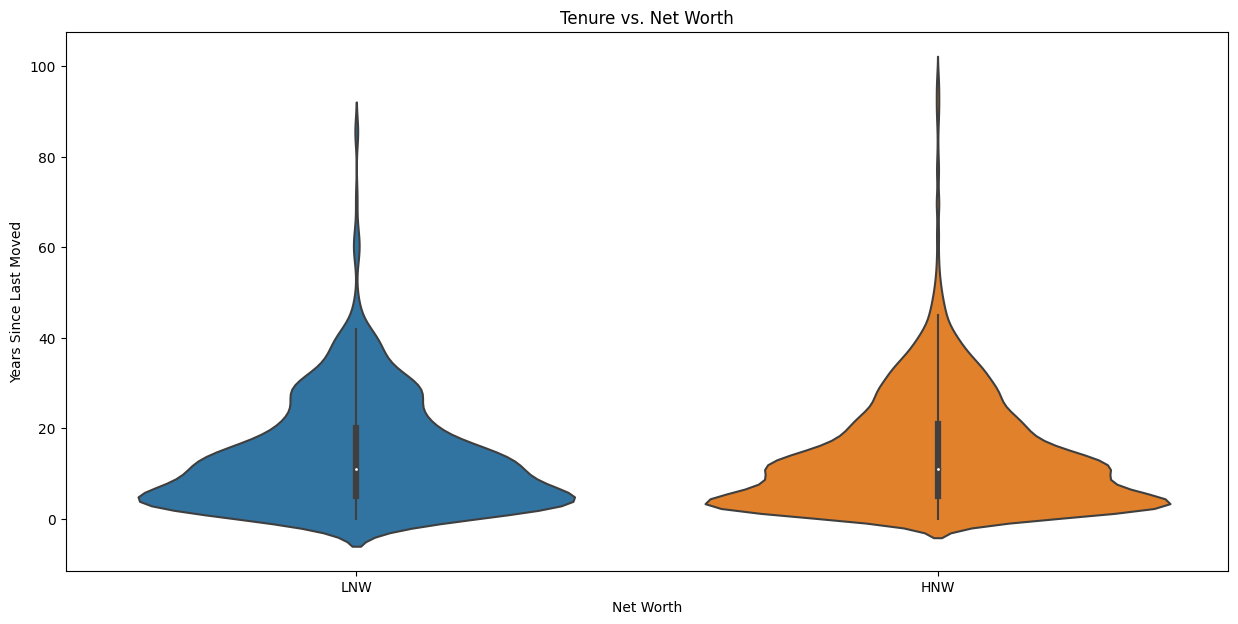

In [25]:
# Calculate the number of years since last moved
current_year = df_train['year_last_moved'].max()
df_train['years_since_last_moved'] = current_year - df_train['year_last_moved']

# Create a violin plot
plt.figure(figsize=(15, 7))
sns.violinplot(x=df_train['net_worth'], y=df_train['years_since_last_moved'])
plt.xlabel('Net Worth')
plt.ylabel('Years Since Last Moved')
plt.title('Tenure vs. Net Worth')

# Set the x-axis tick labels
net_worth_labels = ['LNW', 'HNW']
plt.xticks(ticks=[0, 1], labels=net_worth_labels)

# Show the plot
plt.show()

<a name = Section86></a>
### **8.5 How is the total spending distributed across different Net Worth categories?**

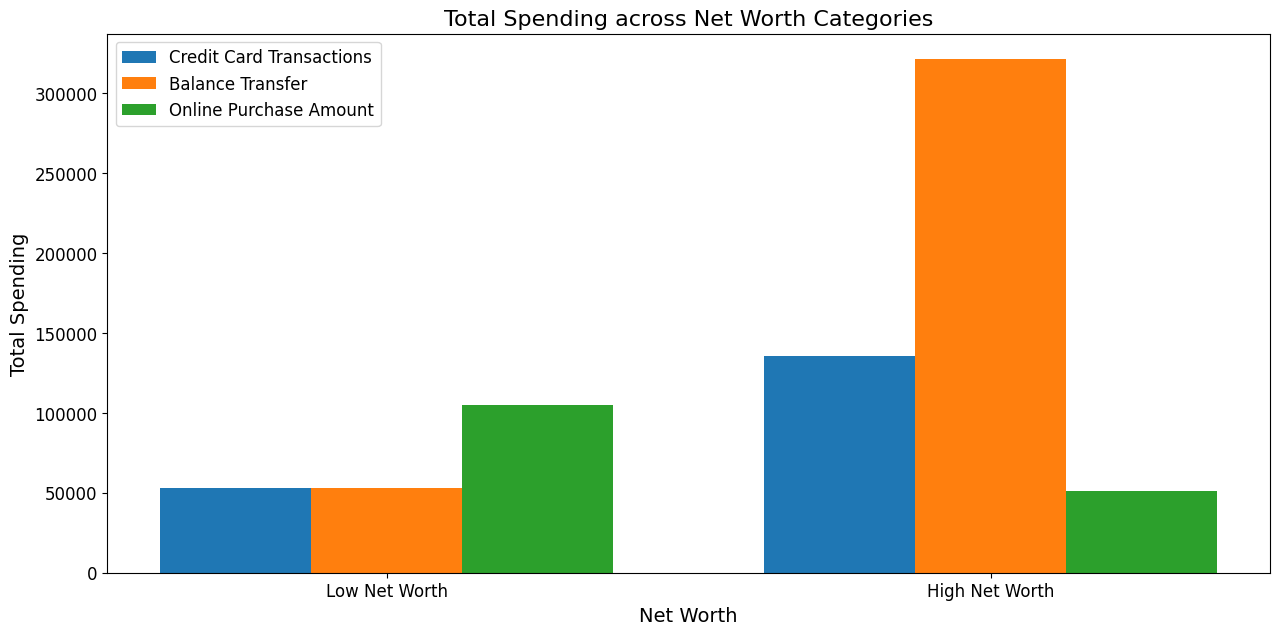

In [26]:
# Set font sizes
plt.rc('font', size=12)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)

# Select the spending columns and net worth column
spending_columns = ['avg_credit_card_txn', 'balance_transfer', 'online_purchase_amount']
net_worth_column = 'net_worth'

# Calculate the total spending for each net worth category
total_spending = df_train.groupby(net_worth_column)[spending_columns].sum()

# Set the bar width
bar_width = 0.25

# Get the indices for positioning the bars
index = np.arange(len(total_spending))

# Create the figure and axes
fig, ax = plt.subplots(figsize=(15, 7))

# Plot the bars
rects1 = ax.bar(index - bar_width, total_spending.iloc[:, 0], bar_width, label='Credit Card Transactions')
rects2 = ax.bar(index, total_spending.iloc[:, 1], bar_width, label='Balance Transfer')
rects3 = ax.bar(index + bar_width, total_spending.iloc[:, 2], bar_width, label='Online Purchase Amount')

# Set the labels and title
ax.set_xlabel('Net Worth')
ax.set_ylabel('Total Spending')
ax.set_title('Total Spending across Net Worth Categories')

# Set the x-labels to English names
ax.set_xticks(index)
ax.set_xticklabels(['Low Net Worth', 'High Net Worth'])

# Set English names in the legends
ax.legend()

# Show the plot
plt.show()

<a name = Section87></a>
### **8.6 Which Region has more HNI's??**

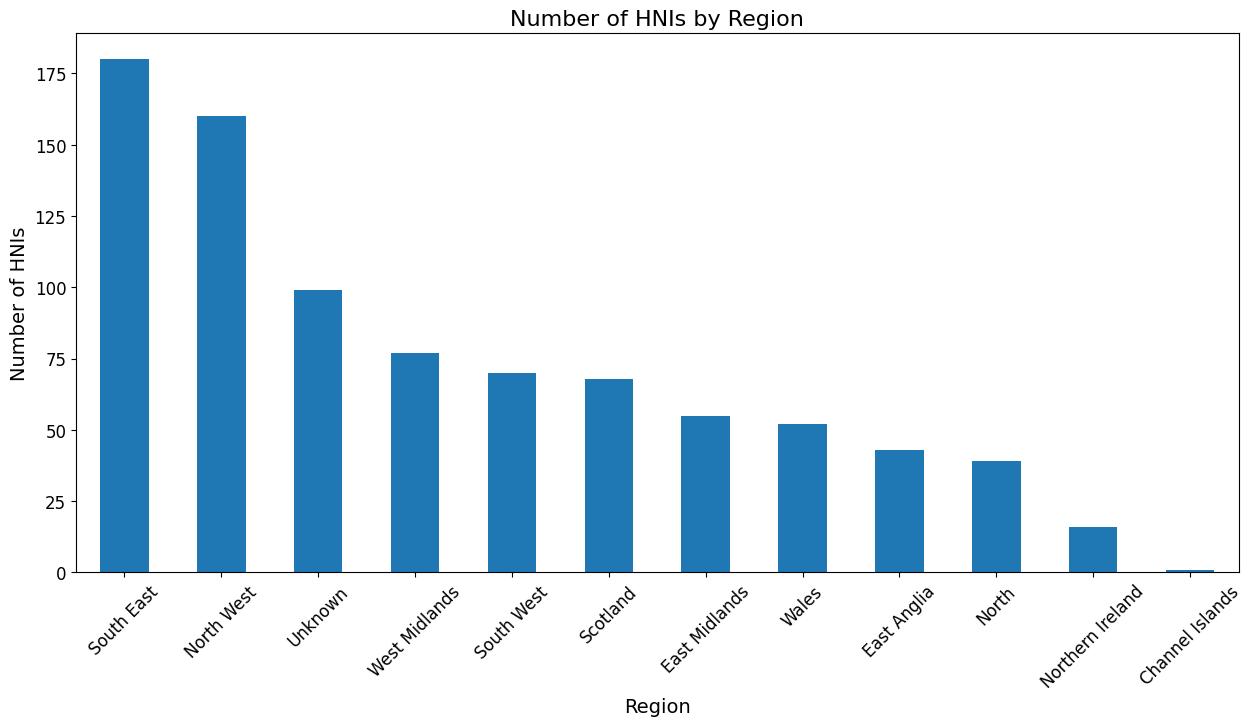

In [27]:
# Count the number of HNIs in each region
hni_count_by_region = df_train[df_train['net_worth'] == 1]['region'].value_counts()

# Plot the bar chart
plt.figure(figsize=(15, 7))
hni_count_by_region.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Number of HNIs')
plt.title('Number of HNIs by Region')
plt.xticks(rotation=45)
plt.show()

<a name = Section88></a>
### **8.7 How is Insurance related to net worth?**

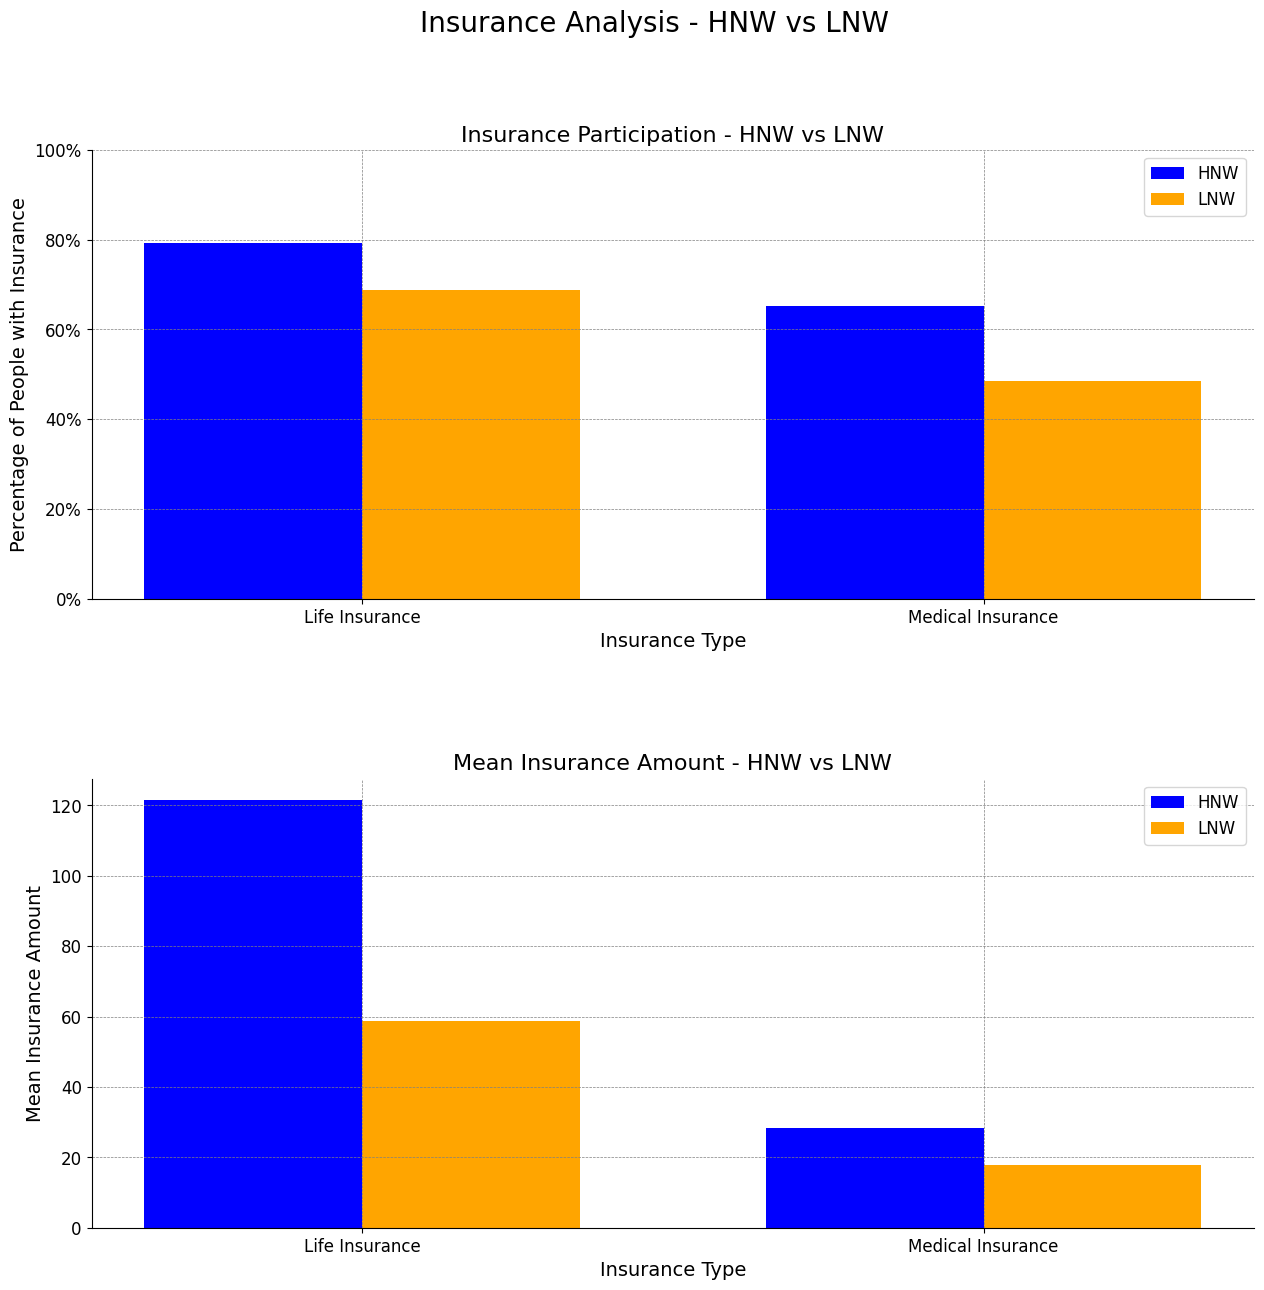

In [28]:
# Insurance columns
insurance_columns = ['life_insurance', 'medical_insurance']

# Calculate insurance participation proportions for HNW and LNW customers
hnw_insurance_counts = [len(df_train[(df_train['net_worth'] == 1) & (df_train[column] > 0)]) for column in insurance_columns]
lnw_insurance_counts = [len(df_train[(df_train['net_worth'] == 2) & (df_train[column] > 0)]) for column in insurance_columns]

hnw_proportions = np.array(hnw_insurance_counts) / len(df_train[df_train['net_worth'] == 1])
lnw_proportions = np.array(lnw_insurance_counts) / len(df_train[df_train['net_worth'] == 2])

# Calculate mean insurance amounts for HNW and LNW customers
mean_insurance_hnw = [df_train[df_train['net_worth'] == 1][column].mean() for column in insurance_columns]
mean_insurance_lnw = [df_train[df_train['net_worth'] == 2][column].mean() for column in insurance_columns]

# Create insurance table
insurance_types = ['Life Insurance', 'Medical Insurance']

data = {
    'Insurance Type': insurance_types,
    'HNW Proportion': hnw_proportions,
    'LNW Proportion': lnw_proportions,
    'Mean Insurance HNW': mean_insurance_hnw,
    'Mean Insurance LNW': mean_insurance_lnw
}

insurance_table = pd.DataFrame(data)
insurance_table[['HNW Proportion', 'LNW Proportion']] = insurance_table[['HNW Proportion', 'LNW Proportion']].applymap('{:.2%}'.format)

# Plotting
bar_width = 0.35
index = np.arange(len(insurance_columns))

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 14))
fig.subplots_adjust(hspace=0.4)

# Bar plot - Insurance Participation Proportions
rects1 = ax1.bar(index, hnw_proportions, bar_width, label='HNW', color='blue')
rects2 = ax1.bar(index + bar_width, lnw_proportions, bar_width, label='LNW', color='orange')

ax1.set_xlabel('Insurance Type', fontsize=14)
ax1.set_ylabel('Percentage of People with Insurance', fontsize=14)
ax1.set_title('Insurance Participation - HNW vs LNW', fontsize=16)
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(insurance_types)
ax1.set_yticks(np.arange(0, 1.2, 0.2))
ax1.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
ax1.legend()

# Bar plot - Mean Insurance Amount
ax2.bar(index, mean_insurance_hnw, bar_width, label='HNW', color='blue')
ax2.bar(index + bar_width, mean_insurance_lnw, bar_width, label='LNW', color='orange')

ax2.set_xlabel('Insurance Type', fontsize=14)
ax2.set_ylabel('Mean Insurance Amount', fontsize=14)
ax2.set_title('Mean Insurance Amount - HNW vs LNW', fontsize=16)
ax2.set_xticks(index + bar_width / 2)
ax2.set_xticklabels(insurance_types)
ax2.legend()

# Set overall title for the plot
fig.suptitle('Insurance Analysis - HNW vs LNW', fontsize=20)

# Add some decorative elements
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='gray', linestyle='--', linewidth=0.5)

plt.show()

<a name = Section89></a>
### **8.8 What are the Portfolio balances of HNW Customers vs LNW Customers?**

In [29]:
df_train = df_train[df_train['portfolio_balance'] <= 4000]

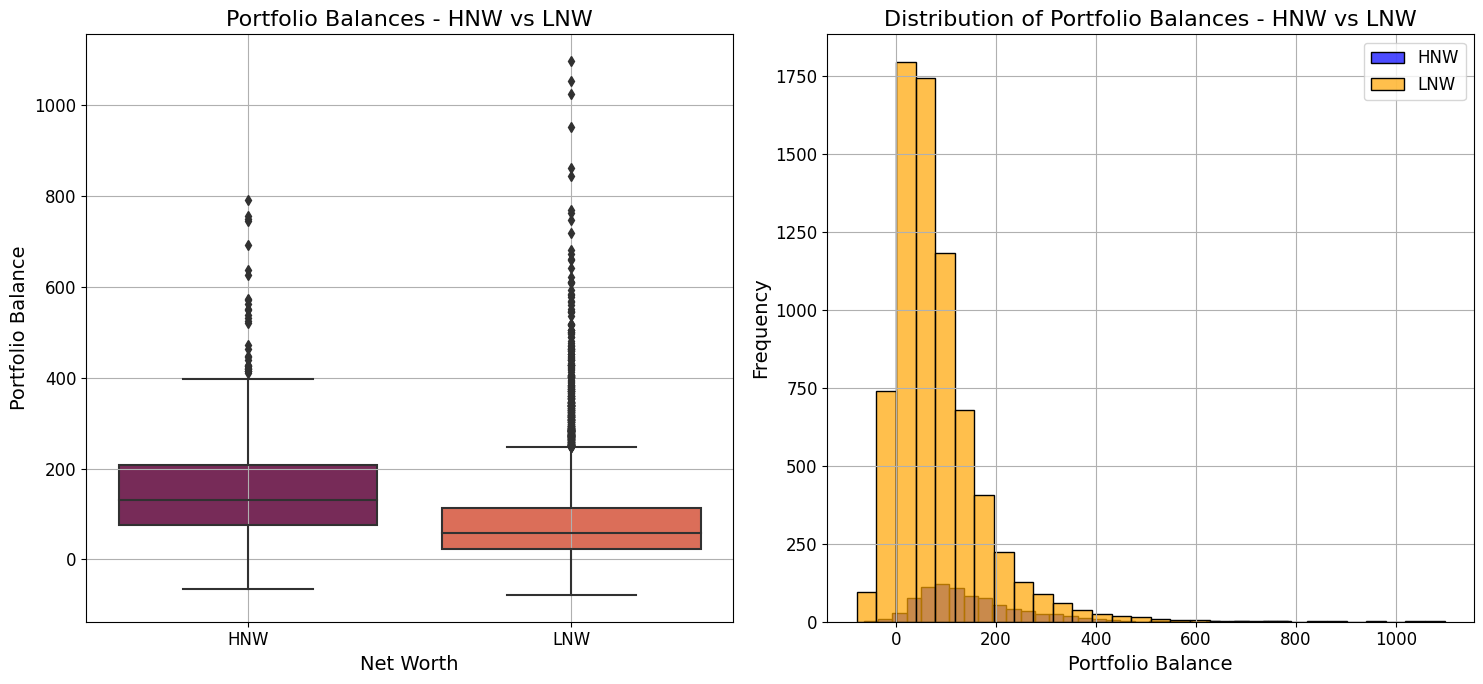

In [30]:
# Filter data for HNW and LNW customers
hnw_portfolio_balances = df_train[df_train['net_worth'] == 1]['portfolio_balance']
lnw_portfolio_balances = df_train[df_train['net_worth'] == 2]['portfolio_balance']

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Box plot - Portfolio Balances
sns.boxplot(x='net_worth', y='portfolio_balance', data=df_train, ax=axes[0], palette='rocket')
axes[0].set_xlabel('Net Worth', fontsize=14)
axes[0].set_ylabel('Portfolio Balance', fontsize=14)
axes[0].set_title('Portfolio Balances - HNW vs LNW', fontsize=16)
axes[0].set_xticklabels(['HNW', 'LNW'])  # Set x-axis labels to 'HNW' and 'LNW'
axes[0].tick_params(labelsize=12)
axes[0].grid(True)

# Histogram - Portfolio Balances
sns.histplot(x=hnw_portfolio_balances, bins=30, alpha=0.7, label='HNW', ax=axes[1], color='blue')
sns.histplot(x=lnw_portfolio_balances, bins=30, alpha=0.7, label='LNW', ax=axes[1], color='orange')
axes[1].set_xlabel('Portfolio Balance', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].set_title('Distribution of Portfolio Balances - HNW vs LNW', fontsize=16)
axes[1].tick_params(labelsize=12)
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


---
<a name = Section9></a>
# **9. Feature Selection and PCA**
---

In [31]:
# Split the data into X (features) and y (target variable)
X = df_train.drop('net_worth', axis=1)
y = df_train['net_worth']

<a name = Section91></a>
### **9.1 Feature Selection with Correlation Matrix**

In [32]:
# Create a correlation matrix between all features and net_worth
corr_matrix = X.corrwith(y)

# Split the correlations into two lists based on positive or negative correlation
neg_corr = corr_matrix[corr_matrix > 0].sort_values(ascending=False)
pos_corr = corr_matrix[corr_matrix < 0].sort_values()

# Multiply the correlations by 100 to express them as percentages
neg_corr = neg_corr * 100
pos_corr = pos_corr * -100

# Print the results
print("Sorted list of Negatively correlated features with net worth (in percentage):\n")
print(neg_corr)
print("\nSorted List of Positively correlated features with net worth (in percentage):\n")
print(pos_corr)

Sorted list of Negatively correlated features with net worth (in percentage):

personal_loan            2.65
years_since_last_moved   1.30
dtype: float64

Sorted List of Positively correlated features with net worth (in percentage):

online_purchase_amount       38.21
equity_investment            28.56
tax_saving_bond_investment   28.54
avg_credit_card_txn          26.05
portfolio_balance            23.46
life_insurance               21.55
commodity_investment         21.10
derivative_investment        17.90
mutual_fund_investment       12.40
avg_account_balance          11.45
medical_insurance            10.22
balance_transfer              7.69
home_loan                     3.10
term_deposit                  1.76
year_last_moved               1.30
num_children                  1.19
dtype: float64


In [33]:
# Set the threshold for dropping columns
threshold = 7.5

# Identify the columns below the threshold and drop them
columns_to_drop = neg_corr[neg_corr < threshold].index.tolist() + pos_corr[pos_corr < threshold].index.tolist()

# Drop the columns only if they exist in the dataset
X = X.drop(columns=columns_to_drop)
df_test = df_test.drop(columns=columns_to_drop, errors='ignore')

# Print the updated dataset
X.head()

,age_band,marital_status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,avg_credit_card_txn,balance_transfer,life_insurance,medical_insurance,avg_account_balance,mutual_fund_investment,tax_saving_bond_investment,online_purchase_amount,gender,region,commodity_investment,equity_investment,derivative_investment,portfolio_balance
0,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,26.98,29.99,299.79,88.72,108.85,134.35,8.98,7.68,Female,North West,151.55,81.79,136.02,360.37
1,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,35.98,74.48,99.96,10.99,48.45,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22
2,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,0.00,24.46,18.44,0.00,0.00,10.46,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50
3,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,44.99,0.00,0.00,29.99,0.00,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98
4,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88


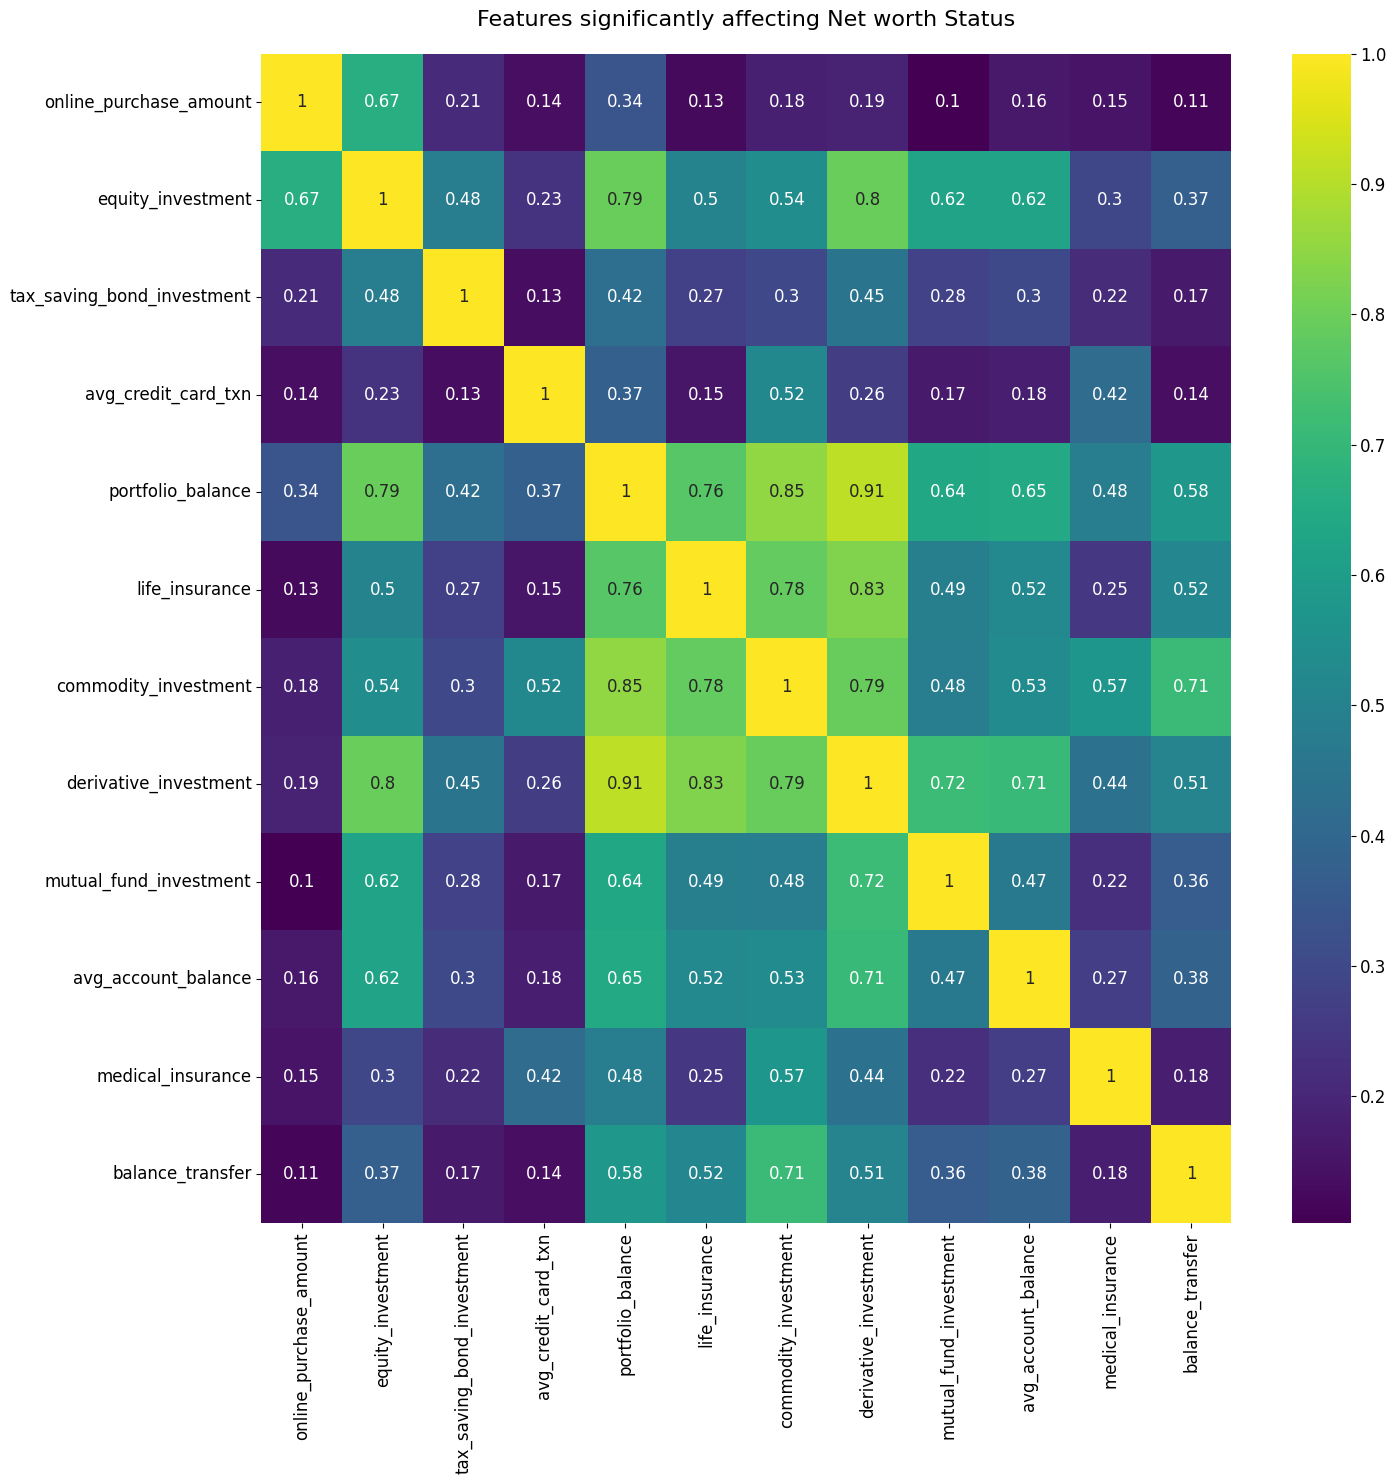

In [34]:
# Updating the pos_corr list to exclude features not present in X
pos_corr = pos_corr[pos_corr.index.isin(X.columns)]

# Set figure size
plt.figure(figsize=(15, 15))

# Plot heatmap of positively correlated features with net worth
sns.heatmap(X[pos_corr.index].corr(), annot=True, cmap='viridis', annot_kws={'fontsize': 12})
plt.title('Features significantly affecting Net worth Status', fontsize=16, pad=20)

# Adjust the plot layout
plt.tight_layout()
plt.show()

<a name = Section92></a>
### **9.2 Encoding Categorical Variables**

In [35]:
# Extract categorical columns for encoding
categorical_cols = X.select_dtypes('object').columns

# Initialize label encoder
label_encoder = LabelEncoder()

# Perform label encoding for age_band column
age_band_mapping = {'18-21': 1, '22-25': 2, '26-30': 3, '31-35': 4, '36-40': 5, '41-45': 6, '45-50': 7,
                    '51-55': 8, '55-60': 9, '61-65': 10, '65-70': 11, '71+': 12, 'Unknown': 0}

X['age_band'] = label_encoder.fit_transform(X['age_band'].map(age_band_mapping))
df_test['age_band'] = label_encoder.transform(df_test['age_band'].map(age_band_mapping))

# Perform label encoding for family_income column
family_income_mapping = {'< 4,000': 1, '< 8,000, >= 4,000': 2, '<10,000, >= 8,000': 3,
                         '<12,500, >=10,000': 4, '<15,000, >=12,500': 5, '<17,500, >=15,000': 6,
                         '<20,000, >=17,500': 7, '<22,500, >=20,000': 8, '<25,000, >=22,500': 9,
                         '<27,500, >=25,000': 10, '<30,000, >=27,500': 11, '>=35,000': 12, 'Unknown': 0}

X['family_income'] = label_encoder.fit_transform(X['family_income'].map(family_income_mapping))
df_test['family_income'] = label_encoder.transform(df_test['family_income'].map(family_income_mapping))

# Perform one-hot encoding for remaining categorical columns
categorical_cols = categorical_cols.drop(['age_band', 'family_income'])  # Remove label encoded columns

onehot_encoder = OneHotEncoder(sparse=False, drop='first')

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
df_test = pd.get_dummies(df_test, columns=categorical_cols, drop_first=True)

# Ensure consistency in one-hot encoding columns between train and test datasets
train_columns = set(X.columns)
test_columns = set(df_test.columns)

# Find columns present in train but not in test
extra_train_columns = train_columns - test_columns

# Add the missing columns to test dataset with values set to 0
for column in extra_train_columns:
    df_test[column] = 0

# Reorder the columns in test dataset to match the order in train dataset
df_test = df_test[X.columns]

<a name = Section94></a>
### **9.3  Balancing Dataset with SMOTE**

In [36]:
# Perform oversampling using SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

<a name = Section94></a>
### **9.4 Feature Scaling**

In [37]:
# Create a scaler object
scaler = StandardScaler()

# Extract numerical columns for scaling
numerical_cols = X.select_dtypes(['int', 'float']).columns

# Scale the numerical columns in the training data
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Scale the numerical columns in the test data
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

In [38]:
print('Training Data Shape:',X.shape)
print('Test Data Shape:',df_test.shape)

Training Data Shape: (14526, 52)
Test Data Shape: (2031, 52)


---
<a name = Section10></a>
# **10. Model Development & Evaluation**
---

In [39]:
# Split the data into training and development sets
x_train, x_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=77, stratify=y)

In [40]:
# Initialize classifiers
log_clf = LogisticRegression(random_state = 77, class_weight='balanced')
sv_clf = SVC(random_state=77, class_weight='balanced', probability=True)
dt_clf = DecisionTreeClassifier(random_state = 77, class_weight='balanced')
rf_clf = RandomForestClassifier(n_estimators=500, random_state = 77, class_weight='balanced', n_jobs=-1)
gb_clf = GradientBoostingClassifier(n_estimators=500, random_state = 77)
nb_clf = GaussianNB()

In [41]:
%%time
# Intialize a list of classifier objects
clf_list = [log_clf, sv_clf, dt_clf, rf_clf, gb_clf, nb_clf]

# Create an empty list to append F1 scores and classifier names
train_f1_scores = []
dev_f1_scores = []
clf_names = []

# Train classifiers over the train data and append F1 scores to the empty lists
for clf in clf_list:
    # Fit the train data to the classifier object
    clf.fit(x_train, y_train)
  
    # Predict the train and dev labels
    train_preds = clf.predict(x_train)
    dev_preds = clf.predict(x_dev)

    # Calculate the train and dev F1 scores
    train_f1 = f1_score(y_train, train_preds, average='macro')
    dev_f1 = f1_score(y_dev, dev_preds, average='macro')
    
    # Append train and dev F1 scores to the empty lists
    train_f1_scores.append(np.round(a=train_f1, decimals=4))
    dev_f1_scores.append(np.round(a=dev_f1, decimals=4))
    clf_names.append(clf.__class__.__name__)

CPU times: user 30.5 s, sys: 363 ms, total: 30.9 s
Wall time: 24.4 s


In [42]:
# Create an F1 score dataframe from the scores and names list
f1_score_frame = pd.DataFrame(data={'Training Set F1 Scores': train_f1_scores, 'Dev Set F1 Scores': dev_f1_scores}, index=clf_names)

# View the F1 scores of all the classifiers
f1_score_frame.transpose()

,LogisticRegression,SVC,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,GaussianNB
Training Set F1 Scores,0.96,0.99,1.00,1.00,1.00,0.81
Dev Set F1 Scores,0.96,0.98,0.95,0.98,0.98,0.80


---
<a name = Section11></a>
# **11. Submission**
---

In [43]:
# Find the index of the classifier with the highest dev F1 score
best_index = np.argmax(dev_f1_scores)
best_classifier_name = clf_names[best_index]

# Use the best classifier to predict on df_test
best_classifier = clf_list[best_index]
test_predictions = best_classifier.predict(df_test)

# Create a new dataframe with only the 'ref_no' column from df_test_og for submission
submission_df = df_test_og[['REF_NO']].copy()

# Add the predicted labels column to the submission dataframe
submission_df['predicted_Revenue_Grid'] = test_predictions

# Save the submission dataframe to a CSV file without index and header
submission_df.to_csv('submission.csv', index=False, header=False)

<center>
  <a href="https://thedatascienceguy.go.studio/">
    <img src="https://raw.githubusercontent.com/Mihir-Ai-lab/The_Data_Science_Guy/main/Images/Notebook%20Footer.png" width="1200" height="627" />
  </a>
</center>